### Logistic Regression

In [1]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
tf.random.set_seed(5)

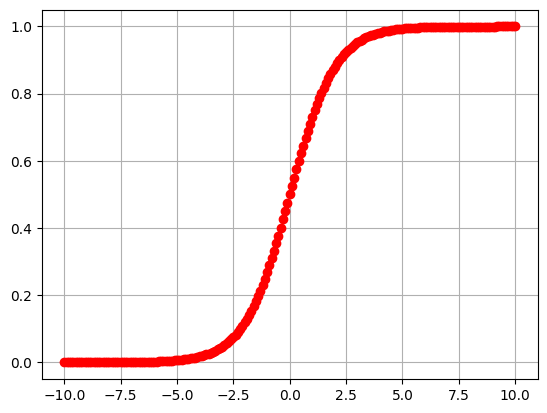

In [2]:
# 시각화

def sigmoid(z):
    return 1./(1. + math.e**-z)

xx,yy=[],[]
for k in range(-100,101):
    n = sigmoid(k/10)
    
    xx.append(k/10)
    yy.append(n)

plt.plot(xx,yy,'ro') 
plt.grid()

In [3]:
# 학습 데이터

x_data = [[1,2],
          [2,3],
          [3,1],
          [4,3],
          [5,3],
          [6,2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

x_train = np.array(x_data,dtype=np.float32)
y_train = np.array(y_data,dtype=np.float32)

In [4]:
# 변수 초기화

W = tf.Variable(tf.random.normal([2, 1]), name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')
print(W)
print(b)

Metal device set to: Apple M2
<tf.Variable 'weight:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.18030666],
       [-0.95028627]], dtype=float32)>
<tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([0.22652863], dtype=float32)>


2023-07-13 00:20:30.776375: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-13 00:20:30.776464: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# 예측 함수

def hypothesis(X):
    return tf.sigmoid(tf.matmul(X, W) + b)

In [6]:
# 비용 함수

def cost_func():
    cost = -tf.reduce_mean(y_train*tf.math.log(hypothesis(x_train)) +
                          (1 - y_train)*tf.math.log(1 - hypothesis(x_train)))
    return cost

In [7]:
# 경사 하강법

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)

In [8]:
# 학습

print('***** Start Learning!!')
for step in range(10001):
    optimizer.minimize(cost_func, var_list=[W, b])
    if step % 1000 == 0:
        print('%04d'%step, 'cost:[', cost_func().numpy(), ']',
             ' W:', W.numpy(), ' b:', b.numpy())
print('***** Learning Finished!!')

***** Start Learning!!
0000 cost:[ 1.661137 ]  W: [[-0.17030667]
 [-0.9402863 ]]  b: [0.23652855]
1000 cost:[ 0.17934625 ]  W: [[1.3178087 ]
 [0.19723618]]  b: [-4.7614326]
2000 cost:[ 0.0725333 ]  W: [[2.0121028 ]
 [0.84058493]]  b: [-8.711955]
3000 cost:[ 0.037006132 ]  W: [[2.6189141]
 [1.2299303]]  b: [-11.698349]
4000 cost:[ 0.020763224 ]  W: [[3.1709251]
 [1.5396556]]  b: [-14.285831]
5000 cost:[ 0.01218494 ]  W: [[3.6928   ]
 [1.8153362]]  b: [-16.68056]
6000 cost:[ 0.007318981 ]  W: [[4.197649 ]
 [2.0743666]]  b: [-18.973692]
7000 cost:[ 0.0044522695 ]  W: [[4.6926713]
 [2.3246496]]  b: [-21.210665]
8000 cost:[ 0.0027277253 ]  W: [[5.1819453]
 [2.5701613]]  b: [-23.415747]
9000 cost:[ 0.0016780437 ]  W: [[5.667814]
 [2.812966]]  b: [-25.602295]
10000 cost:[ 0.001034755 ]  W: [[6.1516356]
 [3.0542414]]  b: [-27.777973]
***** Learning Finished!!


In [9]:
# Weight & Bias

print('Weight:', W.numpy())
print('Bias:', b.numpy())

Weight: [[6.1516356]
 [3.0542414]]
Bias: [-27.777973]


In [10]:
# 평가

def predict(X):
    return tf.cast(hypothesis(X) > 0.5 , dtype = tf.float32)

In [11]:
# 학습 데이터를 그대로 검증 데이터로 사용하여 예측한 경우

x_test = x_train
y_test = y_train

In [12]:
# 예측

preds = predict(x_test)   
print(preds)

tf.Tensor(
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]], shape=(6, 1), dtype=float32)


In [13]:
# 정확도

accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y_test), dtype = tf.float32))
print('Accuracy:', accuracy.numpy())
print('Hypothesis:\n', hypothesis(x_test).numpy())
print('Predict:\n', preds.numpy())

Accuracy: 1.0
Hypothesis:
 [[1.8225575e-07]
 [1.8111556e-03]
 [1.8908702e-03]
 [9.9750584e-01]
 [9.9999464e-01]
 [9.9999976e-01]]
Predict:
 [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
